<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 2: “Cookbook"

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [1]:
import pandas as pd
import numpy as np

## Idioms

In [2]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [3]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


### if-then

In [4]:
df.loc[df.AAA >= 5, "BBB"] = -1

In [5]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [6]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555

In [7]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [8]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000

In [9]:
df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [10]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)

In [11]:
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [12]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [13]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [14]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")

In [15]:
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


## Splitting

In [16]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [17]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [18]:
df[df.AAA <= 5]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [19]:
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


## Building criteria

In [20]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [21]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [22]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [23]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999

In [24]:
df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [25]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [26]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [27]:
aValue = 43.0

In [28]:
df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [29]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [30]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [31]:
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0

In [32]:
AllCrit = Crit1 & Crit2 & Crit3

In [33]:
import functools
CritList = [Crit1, Crit2, Crit3]
AllCrit = functools.reduce(lambda x, y: x & y, CritList)
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


## Selection

### Dataframes

In [34]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [35]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [36]:
df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [37]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

In [38]:
df.loc["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [39]:
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [40]:
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [41]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])
df2.iloc[1:3]
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [42]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


### New columns

In [47]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [ ]:
source_cols = df.columns  # Or some subset would work too
new_cols = [str(x) + "_cat" for x in source_cols]
categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}
df[new_cols] = df[source_cols].map(categories.get)
df

In [44]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [45]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [46]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


### Multiindexing

In [50]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)
df
df = df.set_index("row")
df
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])
df
df = df.stack(0, True).reset_index(1)
df
df.columns = ["Sample", "All_X", "All_Y"]
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


### Arithmetic

In [51]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)
df
df = df.div(df["C"], level=1)
df

A                   B              C     
          O         I         O         I    O    I
n  0.124619  0.733886 -3.264240  0.035247  1.0  1.0
m -0.247625 -0.470373  0.753822 -0.966943  1.0  1.0

### Slicing

In [52]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]
index = pd.MultiIndex.from_tuples(coords)
df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [53]:
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [54]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [55]:
import itertools
index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))
headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))
indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])
cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named
data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]
df = pd.DataFrame(data, indx, cols)
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [56]:
All = slice(None)
df.loc["Violet"]
df.loc[(All, "Math"), All]
df.loc[(slice("Ada", "Quinn"), "Math"), All]
df.loc[(All, "Math"), ("Exams")]
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


### Sorting

In [57]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

## Missing data

In [58]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)
df.loc[df.index[3], "A"] = np.nan
df

,A
2013-08-01,-0.124955
2013-08-02,0.389886
2013-08-05,0.584081
2013-08-06,NaN
2013-08-07,0.521087
2013-08-08,-0.443509


In [59]:
df.bfill()

,A
2013-08-01,-0.124955
2013-08-02,0.389886
2013-08-05,0.584081
2013-08-06,0.521087
2013-08-07,0.521087
2013-08-08,-0.443509


## Grouping

In [ ]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)
df
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()], include_groups=False)

In [64]:
gb = df.groupby("animal")

gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [67]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])
expected_df = gb.apply(GrowUp)
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [68]:
S = pd.Series([i / 100.0 for i in range(1, 11)])
def cum_ret(x, y):
    return x * (1 + y)
def red(x):
    return functools.reduce(cum_ret, x, 1.0)
S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [69]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})
gb = df.groupby("A")
def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())
gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [70]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)
code_groups = df.groupby("code")
agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")
sorted_df = df.loc[agg_n_sort_order.index]
sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [71]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")
ts = pd.Series(data=list(range(10)), index=rng)
def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT
mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}
ts.resample("5min").apply(mhc)
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [72]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)
df
df["Counts"] = df.groupby(["Color"]).transform(len)
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [73]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)
df
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)
df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [74]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])
mask = df.groupby(level=0).agg("idxmax")
df_count = df.loc[mask["no"]].reset_index()
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [75]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

### Splitting

In [76]:
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)
dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]
dfs[0]
dfs[1]
dfs[2]

,Case,Data
7,A,-1.406835
8,A,1.815062


### Pivot

In [78]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)
table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)
table.stack("City", True)

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [79]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]
df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)
df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [82]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", periods=36),
)
pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

,2011
1,-7.205247
2,-4.119420


### Apply

In [83]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)
def SeriesFromSubList(aList):
    return pd.Series(aList)
df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)
df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [84]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)
df
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]
s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)
s

2001-01-01    0.008164
2001-01-02    0.009111
2001-01-03    0.008311
2001-01-04    0.008916
2001-01-05    0.008671
                ...   
2006-04-30    0.005502
2006-05-01    0.004223
2006-05-02    0.003185
2006-05-03    0.002713
2006-05-04    0.002873
Length: 1950, dtype: float64

In [85]:
rng = pd.date_range(start="2014-01-01", periods=100)
df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)
df
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()
window = 5
s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)
s.round(2)

2014-01-06   -0.07
2014-01-07   -0.36
2014-01-08   -0.38
2014-01-09   -0.81
2014-01-10   -0.58
              ... 
2014-04-06    0.89
2014-04-07    0.57
2014-04-08    0.45
2014-04-09    0.47
2014-04-10    0.90
Length: 95, dtype: float64

### Timeseires

In [86]:
dates = pd.date_range("2000-01-01", periods=5)
dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

### Merge

In [87]:
rng = pd.date_range("2000-01-01", periods=6)
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])
df2 = df1.copy()

In [88]:
df = pd.concat([df1, df2], ignore_index=True)
df

,A,B,C
0,-0.050226,-0.140054,-0.135863
1,-0.763194,-0.865717,0.115115
2,-0.653390,0.014509,1.427276
3,1.372485,-1.963069,0.732565
4,-0.443489,0.669790,-1.622021
5,1.403186,0.256427,-0.545051
6,-0.050226,-0.140054,-0.135863
7,-0.763194,-0.865717,0.115115
8,-0.653390,0.014509,1.427276
9,1.372485,-1.963069,0.732565


In [89]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)
df
df["Test_1"] = df["Test_0"] - 1
pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,0.254659,-1,1,-0.705192,0
1,A,160,0,0.908200,-1,1,-1.339607,0
2,A,160,1,-1.339607,0,2,-0.567194,1
3,C,40,0,-1.510581,-1,1,0.925830,0


### Plotting

<Axes: title={'center': 'price'}, xlabel='quartiles'>

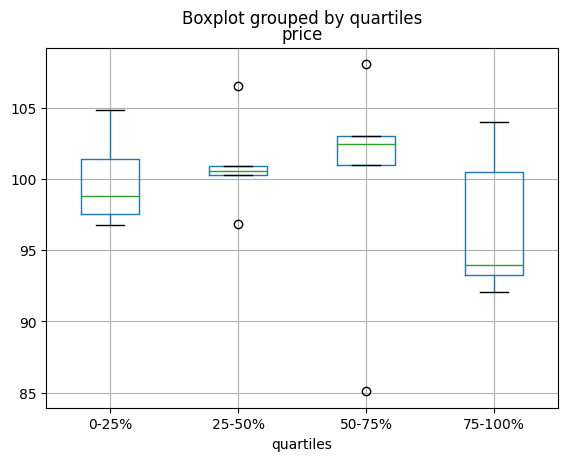

In [90]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)
df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)
df.boxplot(column="price", by="quartiles")

## Data in/out

### Reading multiple files to create a single DataFrame


In [91]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))
files = ["file_0.csv", "file_1.csv", "file_2.csv"]
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [92]:
import glob
import os
files = glob.glob("file_*.csv")
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

### Parsing date components in multi-columns

In [93]:
i = pd.date_range("20000101", periods=10000)
df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})
df.head()
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
8.88 ms ± 6.97 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.97 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Skip row between header and data

In [94]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [95]:
from io import StringIO

pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [96]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns
pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


### HDFStore

In [97]:
df = pd.DataFrame(np.random.randn(8, 3))
store = pd.HDFStore("test.h5")
store.put("df", df)
store.get_storer("df").attrs.my_attribute = {"A": 10}
store.get_storer("df").attrs.my_attribute

{'A': 10}

In [99]:
store = pd.HDFStore("test.h5", "w", driver="H5FD_CORE")
df = pd.DataFrame(np.random.randn(8, 3))
store["test"] = df
store.close()

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3501, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 578, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /usr/local/hdf5/lib/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1898, in H5F_open
    unable to lock the file
  File "H5FD.c", line 1625, in H5FD_lock
    driver lock request failed
  File "H5FDcore.c", line 1667, in H5FD__core_lock
    unable to lock file, errno = 11, error message = 'Resource temporarily unavailable'

End of HDF5 error back trace

Unable to open/create file 'test.h5'

### Binary files

In [103]:
#include <stdio.h>
#include <stdint.h>

typedef struct _Data
{
    int32_t count;
    double avg;
    float scale;
} Data;

int main(int argc, const char *argv[])
{
    size_t n = 10;
    Data d[n];

    for (int i = 0; i < n; ++i)
    {
        d[i].count = i;
        d[i].avg = i + 1.0;
        d[i].scale = (float) i + 2.0f;
    }

    FILE *file = fopen("binary.dat", "wb");
    fwrite(&d, sizeof(Data), n, file);
    fclose(file);

    return 0;
}

SyntaxError: invalid decimal literal (<ipython-input-103-904615fb0f00>, line 20)

In [105]:
names = "count", "avg", "scale"
offsets = 0, 8, 16
formats = "i4", "f8", "f4"
dt = np.dtype({"names": names, "offsets": offsets, "formats": formats}, align=True)


## Computation

### Correlation

In [106]:
df = pd.DataFrame(np.random.random(size=(100, 5)))
corr_mat = df.corr()
mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)
corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,-0.079127,NaN,NaN,NaN,NaN
2,0.018921,0.136045,NaN,NaN,NaN
3,0.132761,0.003198,0.145878,NaN,NaN
4,0.095684,0.100237,0.143736,-0.019695,NaN


In [107]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b
df = pd.DataFrame(np.random.normal(size=(100, 3)))
df.corr(method=distcorr)

,0,1,2
0,1.000000,0.252541,0.178190
1,0.252541,1.000000,0.124588
2,0.178190,0.124588,1.000000


## Timedeltas

In [108]:
import datetime
s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))
s - s.max()
s.max() - s
s - datetime.datetime(2011, 1, 1, 3, 5)
s + datetime.timedelta(minutes=5)
datetime.datetime(2011, 1, 1, 3, 5) - s
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [109]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])
df = pd.DataFrame({"A": s, "B": deltas})
df
df["New Dates"] = df["A"] + df["B"]
df["Delta"] = df["A"] - df["New Dates"]
df
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [110]:
y = s - s.shift()
y
y[1] = np.nan
y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

## Creating example data

In [111]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())
df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)
df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


## Constant seires

In [112]:
v = s.to_numpy()
is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [113]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [114]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()